In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Splitting Dataset

- Common practice:
    
    Dataset ```[0 1 2 3 4 5 6 7 8 9]``` => semua data di datasets digunakan untuk training model ML

    Effect: 
    - model ML _overfitting_ terhadap dataset yang dimiliki (yang dipakai untuk train)
    - model ML _underfitting_ terhadap data baru

<hr>

- Best practice:

    Dataset ```[0 1 2 3 4 5 6 7 8 9]```
    
    Contoh Splitting dataset:
    - 75% untuk training: 7 data pertama / 7 data acak
    - 25% untuk testing: 3 data terakhir / 3 data acak              

In [8]:
from sklearn.datasets import load_boston
dataBoston = load_boston()

In [11]:
dfBoston = pd.DataFrame(
    dataBoston['data'],
    columns = dataBoston['feature_names']
)
dfBoston['PRICE'] = dataBoston['target']
dfBoston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<hr>

### 1. Splitting Manually (80% training, 20% testing)

In [13]:
dfA = dfBoston.copy()
dfA.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
# cek jumlah data 80% & 20%
round(0.8 * 506), round(0.2 * 506)

(405, 101)

In [17]:
dfAtrain = dfA[:405]
dfAtest = dfA[405:]

In [23]:
dfAtrain.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
400,25.04610,0.0,18.1,0.0,0.693,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77,5.6
401,14.23620,0.0,18.1,0.0,0.693,6.343,100.0,1.5741,24.0,666.0,20.2,396.90,20.32,7.2
402,9.59571,0.0,18.1,0.0,0.693,6.404,100.0,1.6390,24.0,666.0,20.2,376.11,20.31,12.1
403,24.80170,0.0,18.1,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77,8.3
404,41.52920,0.0,18.1,0.0,0.693,5.531,85.4,1.6074,24.0,666.0,20.2,329.46,27.38,8.5


In [22]:
dfAtest.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [24]:
dfAtrain.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.166890,0.370996,-0.007658,0.397159,-0.184066,0.303537,-0.339010,0.654754,0.604794,0.223664,-0.056239,0.418584,-0.308585
ZN,-0.166890,1.000000,-0.506528,-0.078943,-0.491188,0.309421,-0.557080,0.642824,-0.244475,-0.229858,-0.332829,0.133939,-0.392262,0.314426
INDUS,0.370996,-0.506528,1.000000,0.150419,0.753109,-0.406524,0.616278,-0.676835,0.478076,0.604623,0.247341,-0.272036,0.562216,-0.390934
CHAS,-0.007658,-0.078943,0.150419,1.000000,0.164657,0.079276,0.138089,-0.160595,0.116658,0.075813,-0.074926,-0.052024,-0.006858,0.142752
NOX,0.397159,-0.491188,0.753109,0.164657,1.000000,-0.319490,0.719280,-0.755375,0.548864,0.624159,0.041972,-0.347498,0.547472,-0.323931
RM,-0.184066,0.309421,-0.406524,0.079276,-0.319490,1.000000,-0.237949,0.171442,-0.229655,-0.310383,-0.361922,0.198575,-0.645324,0.748162
AGE,0.303537,-0.557080,0.616278,0.138089,0.719280,-0.237949,1.000000,-0.729570,0.402101,0.449627,0.167097,-0.207007,0.575258,-0.294217
DIS,-0.339010,0.642824,-0.676835,-0.160595,-0.755375,0.171442,-0.729570,1.000000,-0.436184,-0.460266,-0.108714,0.203981,-0.435527,0.132128
RAD,0.654754,-0.244475,0.478076,0.116658,0.548864,-0.229655,0.402101,-0.436184,1.000000,0.877950,0.347270,-0.055135,0.395295,-0.237589
TAX,0.604794,-0.229858,0.604623,0.075813,0.624159,-0.310383,0.449627,-0.460266,0.877950,1.000000,0.316534,-0.157640,0.450959,-0.344826


In [26]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model2 = LinearRegression()

In [27]:
# model 1: linear regression 
# train: dfA, features: ['RM', 'LSTAT'], target: ['PRICE']

model1.fit(dfA[['RM', 'LSTAT']], dfA['PRICE'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# model 2: linear regression 
# train: dfAtrain, features: ['RM', 'LSTAT'], target: ['PRICE']
# test: dfAtest, features: ['RM', 'LSTAT'], target: ['PRICE']

model2.fit(dfAtrain[['RM', 'LSTAT']], dfAtrain['PRICE'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
print(model1.coef_, model1.intercept_)
print(model2.coef_, model2.intercept_)

[ 5.09478798 -0.64235833] -1.358272811874457
[ 6.28559228 -0.52915375] -9.62840258887513


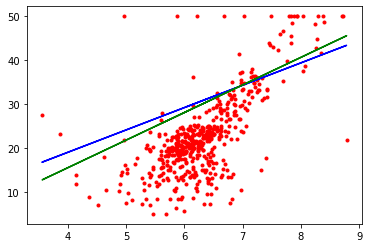

In [34]:
# plot RM vs PRICE
plt.plot(dfA['RM'], dfA['PRICE'], 'r.')
plt.plot(dfA['RM'], model1.coef_[0] * dfA['RM'] + model1.intercept_, 'b-')
plt.plot(dfAtrain['RM'], model2.coef_[0] * dfAtrain['RM'] + model2.intercept_, 'g-')
plt.show()

In [41]:
# cek akurasi prediksi model1 (100%) thd semua data
model1.score(dfA[['RM', 'LSTAT']], dfA['PRICE'])

0.6385616062603403

In [42]:
# cek akurasi prediksi model1 (100%) thd data tes
model1.score(dfAtest[['RM', 'LSTAT']], dfAtest['PRICE'])

-0.07915180662952004

In [39]:
# cek akurasi prediksi model2 (80%) terhadap data training
model2.score(dfAtrain[['RM', 'LSTAT']], dfAtrain['PRICE'])

0.6490254493845824

In [40]:
# cek akurasi prediksi model2(80%) terhadap data testing
model2.score(dfAtest[['RM', 'LSTAT']], dfAtest['PRICE'])

-0.3769178894323768

<hr>

### 2. Splitting w/ Sklearn (80% training, 20% testing)

In [45]:
dfB = dfBoston.copy()

In [46]:
# splitting with train_test_split method
from sklearn.model_selection import train_test_split

In [92]:
# method ini return 4 vars = xtrain 80%, xtes 20%, ytrain 80%, ytes 20%
xtrain, xtes, ytrain, ytes = train_test_split(
    dfB[['RM', 'LSTAT']], dfB['PRICE'], train_size=.8, 
    random_state=10
)

In [94]:
print(xtrain.iloc[0].name)
print(ytrain.index[0])
xtrain.iloc[0]

50
50


RM        5.963
LSTAT    13.450
Name: 50, dtype: float64

In [95]:
len(xtrain), len(ytrain), len(xtes), len(ytes), xtrain.shape

(404, 404, 102, 102, (404, 2))

In [98]:
modelB = LinearRegression()
# training dg xtrain, ytrain
modelB.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
# cek akurasi thd data training
modelB.score(xtrain, ytrain)

0.6363353379616083

In [100]:
# cek akurasi thd data testing
modelB.score(xtes, ytes)

0.6041142735229121

<hr>

### Effect Salah Splitting

In [102]:
dfC = dfBoston.copy()

In [105]:
modelC = LinearRegression()
modelC.fit(dfC[['RM', 'LSTAT']][:2], dfC['PRICE'][:2])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

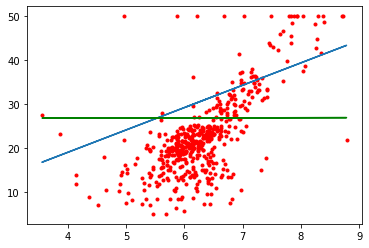

In [116]:
plt.plot(dfC['RM'], dfC['PRICE'], 'r.')
plt.plot(dfA['RM'], model1.coef_[0] * dfA['RM'] + model1.intercept_)
plt.plot(dfC['RM'], modelC.coef_[0] * dfC['RM'] + modelC.intercept_, 'g-')
plt.show()

<hr>

### Exercise: California Housing

In [117]:
from sklearn.datasets import fetch_california_housing

In [118]:
data = fetch_california_housing()

In [121]:
dfCali = pd.DataFrame(
    data['data'],
    columns = data['feature_names']
)
dfCali['PRICE'] = data['target']
dfCali.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894
